# Introduction

In this notebook, I will perform Exploratory Data Analysis (EDA) on admission status of high school graduates
applying for universities. 

Steps:
1. Missing value check and handling
2. Duplicated value check and handling
3. Statistical summaries of columns
4. Univariate analysis
5. Bivariate analysis
6. Overall summary/EDA findings

**Name**: Haryo Prabowo

# Import Libraries and Load Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Bootcamp/Project/Assignments/Assignment Day 17/admission_data.csv')
data

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0
...,...,...,...,...,...,...,...,...
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0


# 1. Missing value check and handling

In [4]:
#General Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


In [5]:
# number of missing values per column
data.isna().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_status               0
dtype: int64

In [6]:
# drop na values
data = data.dropna()
data.isna().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
dtype: int64

# 2. Duplicated value check and handling

In [7]:
# number of duplicated data
data.duplicated().sum()

5

In [8]:
# sample duplicated rows
data[data.duplicated(keep=False)].head(5)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
10,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
74,314.0,106.0,3.0,3.0,5.0,8.90,no,1
111,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
311,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
364,313.0,102.0,3.0,3.5,4.0,8.90,yes,1


Dropping duplicated rows

In [9]:
# drop duplicated rows
data = data.drop_duplicates()
data.duplicated().sum()

0

# 3. Statistical summaries of columns

In [10]:
# group column names based on type
categoricals = ['research_exp']

numericals = ['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength', 'recommendation_strength', 'gpa', 'admit_status']

In [11]:
# numerical statistical sumnary
data[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_status
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,316.327586,107.090517,3.118534,3.366379,3.476293,8.567241,0.571121
std,11.242104,5.934888,1.119704,0.968974,0.919244,0.598476,0.495450
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000
50%,316.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000
75%,324.000000,111.250000,4.000000,4.000000,4.000000,9.025000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


Observation:
1. `admit_status` column is a boolean/binary column
2. Overall, the minimum and maximum values make sense for each column
3. Mean ~ 50% (Median) in all numericals columnn (`gre_score`, `toefl_score`, `univ_ranking`, `motiv_letter_strength`, `recommendation_strength`, `gpa`), indicating somewhat symmetrical distribution
4. `admit_status` as an boolean column have '1' as median, indicating that '1' is the dominant values

In [12]:
# describe categorical data
data[categoricals].describe()

,research_exp
count,464
unique,2
top,yes
freq,252


Observations:
1. All of the categoricals data is a binary column (2 unique value)
2. Most of the data have 'yes' for the `research_exp` ('yes' is the dominant values)

# 4. Univariate analysis

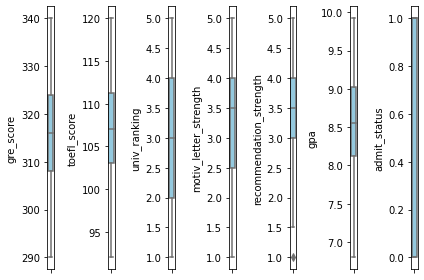

In [13]:
#Boxplot to detect outliers
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='skyblue')
    plt.tight_layout()

Obervation:
1. There is an outlier in the recommendation_strength column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

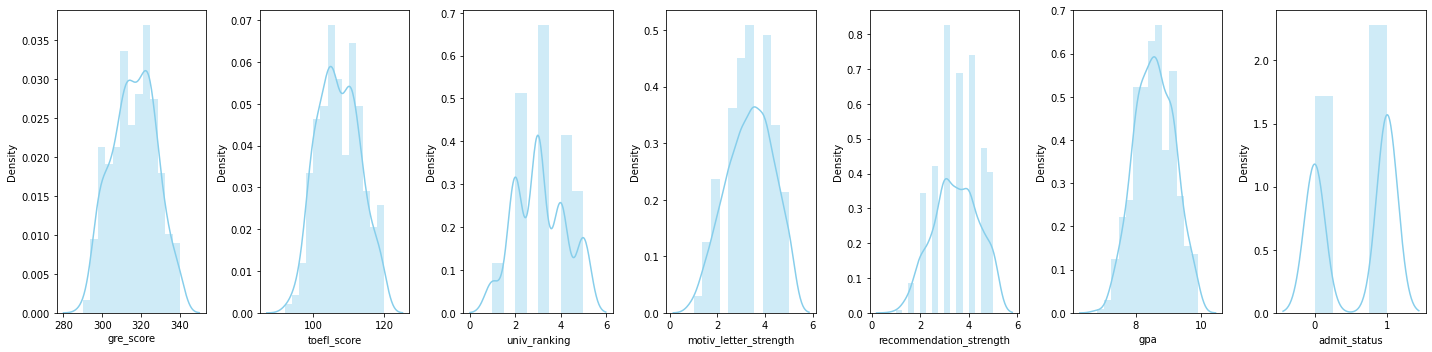

In [14]:
#KDE plot for knowing the distribution form
features = numericals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. Most columns have symmetric-ish distribution (no major skew)

# 5. Bivariate analysis

In [15]:
# dataset
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


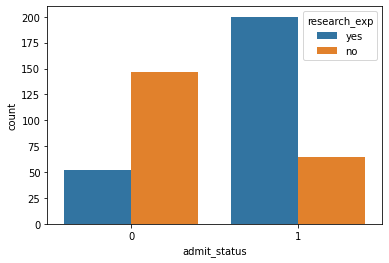

In [16]:
# research_exp vs admit_status likelihood
sns.countplot(data=data,
            x='admit_status',
            hue='research_exp')

Observations:
1. Someone who have research experience is more likely to be admitted (`admit_status` = '1')

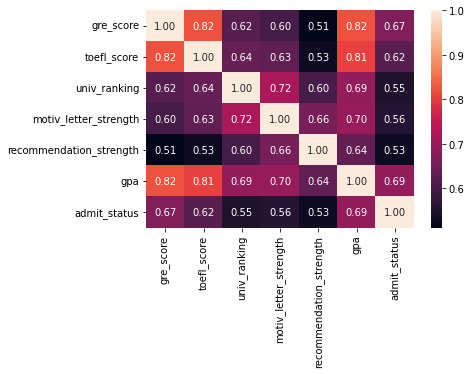

In [17]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
1. `toefl_score` and `gre_score` is highly correlated
2. `toefl_score` and `gpa` is highly correlated
3. `gpa` and `gre_score` is highly correlated
*   choose only one of them for modelling (either `toefl_score`, `gre_score`, or `gpa`)

In [ ]:
#Pairplot, breakdown on admit_status
sns.pairplot(data, hue='admit_status')

Observation:
1. Most of the students who are admitted have high score/grade (`gre_score`, `gpa`, `toefl_score`)
2. Many admitted students have good recommendation & motivation letter strength and good university ranking.
3. Some of the students that have low recommendation & motivation letter strength are still admitted as long as the scores/grade are still high enough

# 6. Overall summary/EDA findings

1. The data does not contain major issues. There are only some NULL values and duplicated rows, and have been handled accordingly.
2. Overall, the minimum and maximum values make sense for each column. 
3. Overall, all numeric columns have a somewhat symmetrical distributions, with an outlier in recommendation_strength column
4. From the barchart of research experience vs admit status: we found that students who have research experience is more likely to be admitted
5. From correlation heatmap: we note that TOEFL Score, GRE Score and GPA is highly correlated --> choose only one of them for modelling
6. From Pairplot on admit_status: we found many useful insights, with the keypoint being most students that are admitted have high score in TOEFL Score, GRE Score and GPA